# Examen d'OCVX2

## Maria Princi, Hugo Linsenmaier, Daniel Godin 

# 1 Méthode de Newton

## 1.1 Méthode de Newton

La méthode de Newton est une méthode de second ordre où l’on chercheà mininiser l’approximation de second ordre de la fonction objectif.

### 1.1.1 Cas sans contraintes

#### Question 1-1.  Générer des problèmes d’optimisations sans contraintes.

In [3]:
class test_function():
    """Objet Test Function.
    
    Représente un problème d'optimisation.
    """  
    
    def __init__(self, name, value, dim, nb_params, convex=None, grad=None, hess=None, HCN=None, constraints = None):
        """ 
        Instancie un objet Test Function.

        Attributes:
        name: nom de la fonction.
        value: valeur de la fonction.
        dim: nombre de dimensions.
        nb_params: nombre de parametres que prend la fonction.
        convex: la fonction est convexe (True) ou pas (False).
        grad: gradient de la fonction.
        hess: hessienne de la fonction.
        """
        self.name = name
        self.value = value
        self.dim = dim
        self.nb_params = nb_params
        self.convex = convex
        self.grad = grad
        self.hess = hess

Problèmes d’optimisations sans contraintes et leurs plots et résultats obtenus avec la méthode de Newton :

In [4]:
# fonction convexe à une dimension admettant un minimum en x=-0.5, y=0.75

mini_1_d = {
    "name": "mini_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x: np.square([x])+x+1),
    "grad"  : (lambda x: np.array([2*x + 1])),
    "hess"  : (lambda x: np.array([2]))
}

mini_1 = test_function(**mini_1_d)

Temps d'execution : 0.0003743171691894531 secondes
Estimation :  [-0.5]
Ob value :  [0.75]
Nombre d'iterations :  2


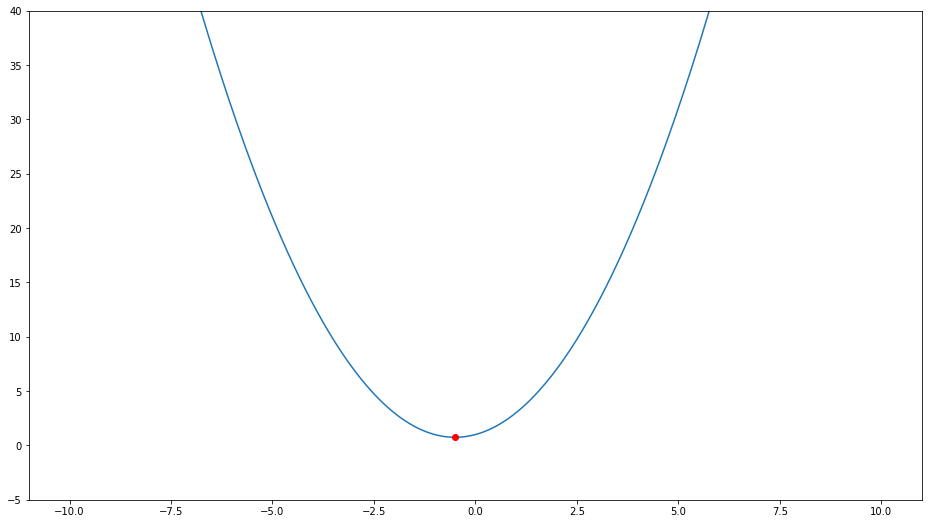

In [5]:
test_mini()

In [6]:
exp_1_d = {
    "name": "exp_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x: np.array([np.exp(x)+np.exp(-x)])),
    "grad"  : (lambda x: np.array([np.exp(x)-np.exp(-x)])),
    "hess"  : (lambda x: np.array([np.exp(x)+np.exp(-x)]))
}

exp_1 = test_function(**exp_1_d)

Temps d'execution : 0.002985715866088867 secondes
Estimation :  [0.02719736]
Ob value :  [2.00073974]
Nombre d'iterations :  39


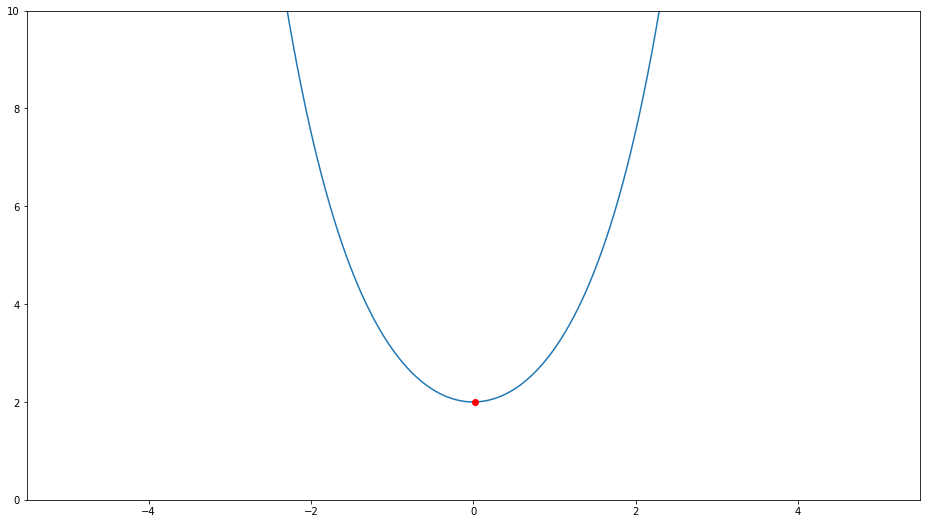

In [7]:
test_exp()

In [8]:
cubic_1_d = { 
    "name": "cubic_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : False,
    "value" : (lambda x: np.array([np.power(x,3) + 3*np.square(x) + x + 1])),
    "grad"  : (lambda x: np.array([3*np.square(x) + 6*x + 1])),
    "hess"  : (lambda x: np.array([6*x + 6]))
}

cubic_1 = test_function(**cubic_1_d)

Temps d'execution : 0.0011713504791259766 secondes
Estimation :  [-0.17341095]
Ob value :  [0.91158842]
Nombre d'iterations :  19


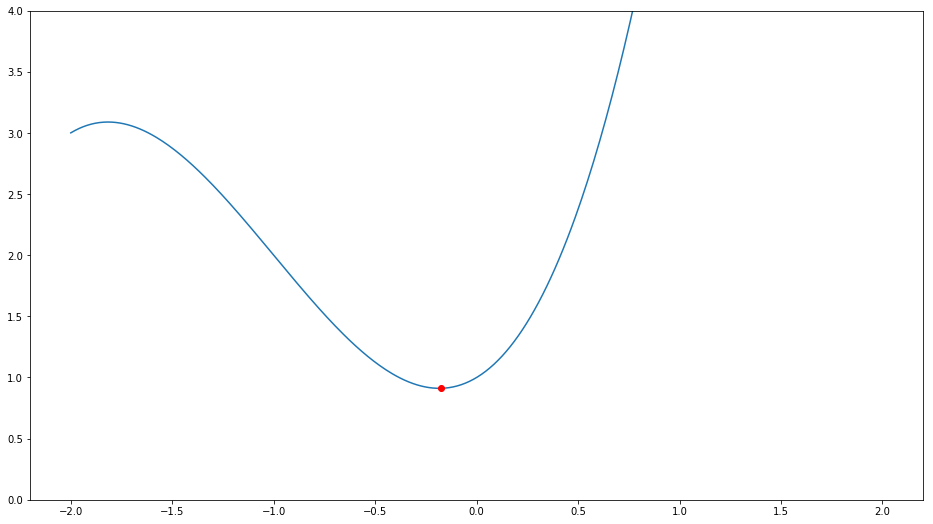

In [9]:
test_cubic()

In [10]:
# fonction quadratique à deux dimensions centrée en x=0, y=0

func_3_d = {
    "name": "quad_2",
    "dim" : 2,
    "nb_params" : 1,
    "convex" : True ,
    "value" : (lambda x: x[:, 0]**2 + 10*x[:, 1]**2),
    "grad"  : (lambda x: np.array([[2*x[:, 0]], [20*x[:, 1]]]).reshape(1, -1)),
    "hess"  : (lambda x: np.diag([2, 20]))
}

func_3 = test_function(**func_3_d)

Temps d'execution : 0.0013720989227294922 secondes
Estimation :  [0. 0.]
Ob value :  [0.]
Nombre d'iterations :  2


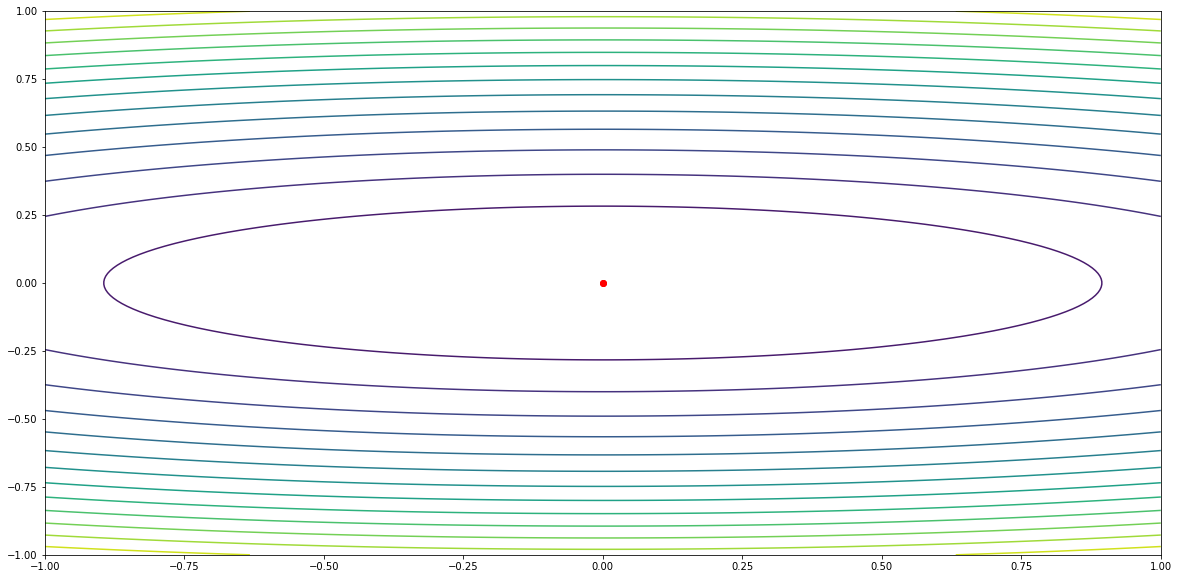

In [11]:
test_quad()

####  Question 1-2. Implémenter et tester une méthode de Newton contre le test set que vous avez généré.

In [12]:
def newton(f, x, epsilon=0.0001):
    """Implémente la méthode de Newton visant à calculer un
    point optimal d'une fonction convexe.
    
    Args:
        f: fonction objectif.
        x: point initial appartenant au domaine de f.
        epsilon: tolérance.
        
    Output:
        (ndarray) point optimal.
        (ndarray) valeur optimale.
        (int) nombre d'itérations.

    """
    
    hess_inv = hess_inverse(f, x)
    
    x_dir = get_direction(f, x, hess_inv)
    # lambda pour la condition d'arret
    l = get_lambda(f, x, x_dir)
    
    n_iter = 0
    
    while not found(f, l, epsilon):
        
        # mise à jour des valeurs en fonction du nouveau x
        x_dir = get_direction(f, x, hess_inv)
        l = get_lambda(f, x, x_dir)

        # mise à jour de x
        x = x+x_dir
        n_iter += 1
    
    ob_val = f.value(x)
    
    return x.flatten(), ob_val.flatten(), n_iter

####  Question 1-3. Comparer votre méthode de Newton aux implémentation de descente de gradient vu en TP.

In [13]:
test_summary

,method,temps_exec,estimation,ob_value,nb_iter
mini_1_0,GD pas constant,0.025293,[-0.49999950459258535],[0.7500000000002454],835
mini_1_1,GD backtracking,0.001932,[-0.49999969916261006],[0.7500000000000905],34
mini_1_2,GD l1,0.002544,[-0.49999954707289596],[0.7500000000002052],76
mini_1_3,Newton,0.000116,[-0.5],[0.75],2
exp_1_0,GD pas constant,0.035465,[4.964006744069027e-07],[2.0000000000002465],747
exp_1_1,GD backtracking,0.002811,[-3.3301613375667285e-07],[2.000000000000111],37
exp_1_2,GD l1,0.002696,[4.4825898218660144e-07],[2.000000000000201],66
exp_1_3,Newton,0.001370,[0.027197363780131368],[2.0007397421936344],39
cubic_1_0,GD pas constant,0.009470,[-0.1835032221207479],[0.9113378920964603],312
cubic_1_1,GD backtracking,0.001770,[-inf],[nan],8


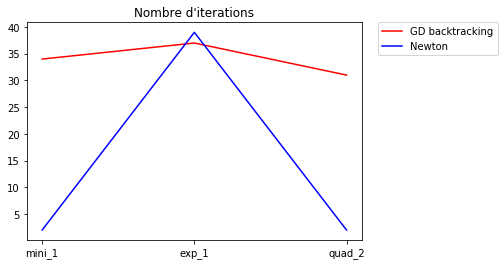

In [14]:
compare_nb_iter()

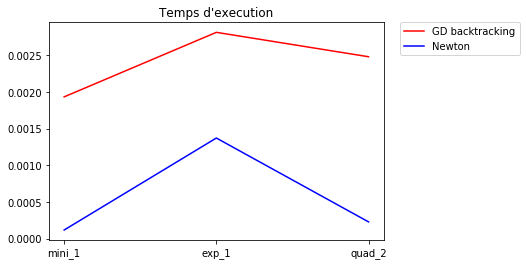

In [15]:
compare_exec_time()

### 1.1.2 Cas avec contraintes d’égalités

####  Question 1-4. Étendre le test set du cas sans contraintes pour générer des problèmes d’optimi- sation convexes sous contraintes d’égalités.

Pour générer des fonctions avec contraintes, on va reprendre la structure précédentes pour les fonction
sans contraintes en rajoutant uniquement des champs pour représenter les contraintes de la forme $Ax = b$.
* On a donc un champs A pour la matrice A.
* Un champs b pour le vecteur b.
* Un champs x0 pour une solution particulière du système. 

In [16]:
class test_function2():
    
    def __init__(self, name, value, dim, nb_params, convex=None, grad=None, hess=None, HCN=None, A = None, b =None, x0 = None):
        self.name = name
        self.value = value
        self.dim = dim
        self.nb_params = nb_params
        self.convex = convex
        self.grad = grad
        self.hess = hess
        self.HCN = HCN
        self.A = A
        self.b = b
        self.x0 = x0

In [17]:
# Exemple d'une fonction avec contraintes, les autres sont fournis dans le notebook Code.ipynb
quad_II_d_cons = {
    "name": "quadric_2",
    "dim" : 2,
    "nb_params" : 1,
    "convex" : True ,
    "value" : (lambda x, gamma: x[:, 0]**2 + gamma*x[:, 1]**2),
    "grad"  : (lambda x, gamma: np.array([2*x[:, 0], 2*gamma*x[:, 1]])),
    "hess"  : (lambda x, gamma: np.diag([2, 2*gamma])),
    "HCN"   : (lambda x, gamma: gamma),
    "A"     : np.array([[2, 3]]),
    "b"     : 3,
    "x0"    : np.array([[0], [1]])
}

quad_II_cons = test_function2(**quad_II_d_cons)

#### Question 1-5. Implémenter une méthode de résolution des problèmes générés basées sur une descente de gradient après élémination des contraintes d’égalités et la tester.

Pour éliminer les contraintes on va tout simplement calculer la matrice F de l'espace null de A en utilisant
la fonction de scipy null_space.
Ensuite étant donnéé que nos solutions peuvent s'écrirent sous la forme $Fz + x0$ avec x0 solution particulière.
On va tout simplement effectuer la descente de gradient sur z.

In [18]:
# voici la fonction (La classe GD de descente de gradient est fourni dans Code.ipynb)
def gradient_cons(function, start_point):
    F = null_space(function.A)
    GD_default = GD()
    gd_op_pt, iters, iters_dir, gd_n_iter = GD_default(start_point, 
                            (lambda x : function.value ((np.dot(F, x) + function.x0).reshape(1, -1), 1)), 
                            (lambda x, f, tol : np.dot(F.reshape(1, -1), 
                                function.grad ((np.dot(F, x) + function.x0).reshape(1, -1), 1))), True)
    return (np.dot(F, gd_op_pt) + function.x0, iters, iters_dir, gd_n_iter)
    

On effectue un test sur la minimisation de $x^2 + y^2$ sous la contrainte, $2x + 3y = 3$ 

Temps d'execution : 0.008121967315673828 secondes
Estimation :  [0.46153818 0.69230788]
Ob value :  [0.69230769]
Nombre d'iterations :  28


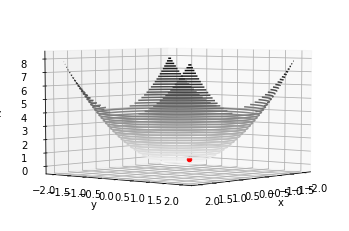

In [19]:
# Résultat du test
func = quad_II_1_cons
test_gd_cons(start_point, func)


####  Question 1-6. Implémenter la méthode de Newton sous contraintes d’égalités et la tester sur le test set généré.

La méthode de newton pour le cas avec contraintes ne diffère pas énormément de l'implémentation présenté
précédemment. On va juste donner comme point initial une solution particulière, et pour le delta_x on va le calculer à l'aide de la matrice de KKT.

In [20]:
# Implémentation de newton avec contraintes
def newton_cons(f, x, A, epsilon = 0.00001):
    x = x.reshape(1, -1)
    print(x)
    if (len(f.hess(x, 1).shape) == 1):
        hess_inv = 1/f.hess(x, 1)
    else:
        hess_inv = np.linalg.inv(f.hess(x, 1))
    x_dir = -1*hess_inv@f.grad(x, 1)
    #création de la matrice KKT
    kkt_up = np.hstack((f.hess(x, 1), np.transpose(f.A)))
    kkt_down = np.hstack((f.A, [[0]]))
    kkt_left = np.vstack((kkt_up, kkt_down))
    kkt_right = np.vstack((-1 * f.grad(x, 1), 0))
    # on résoud pour trouver le x_dir
    x_dir = np.linalg.solve(kkt_left, kkt_right)[0:f.dim]
    
    l = abs(-1*np.transpose(f.grad(x, 1))@x_dir)
    n_iter = 0
    while abs(l/2) > epsilon:
        
         #création de la matrice KKT
        kkt_up = np.hstack((f.hess(x, 1), np.transpose(f.A)))
        kkt_down = np.hstack((f.A, [[0]]))
        kkt_left = np.vstack((kkt_up, kkt_down))
        kkt_right = np.vstack((-1 * f.grad(x, 1), 0))
        # on résoud pour trouver le x_dir
        x_dir = np.linalg.solve(kkt_left, kkt_right)[0:f.dim]
        
        l = abs(-1*np.transpose(f.grad(x, 1))@x_dir)
        t = 1#backtracking(f, x, x_dir)
        x = (x+(t*x_dir).reshape(1, -1))
        n_iter += 1
    
    ob_val = f.value(x, 1)
    
    return x.flatten(), ob_val.flatten(), n_iter
    

##### Tests des fonctions et affichage du point obtenu

On effectue un test sur la minimisation de $x^2 + y^2$ sous la contrainte, $2x + 3y = 3$ 

Temps d'execution : 0.0013492107391357422 secondes
Estimation :  [0.46153846 0.69230769]
Ob value :  [0.69230769]
Nombre d'iterations :  2


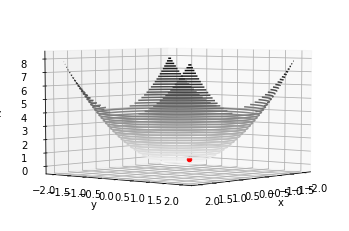

In [21]:
func = quad_II_1_cons
test_newton_cons(func)

On effectue un test sur la minimisation de $x^2 + 0.5y^2$ sous la contrainte, $2x + 3y = 8$ 

Temps d'execution : 0.0010027885437011719 secondes
Estimation :  [0.72727273 2.18181818]
Ob value :  [2.90909091]
Nombre d'iterations :  2


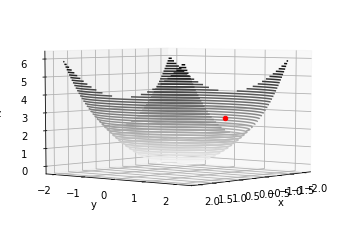

In [22]:
func = quad_II_2_cons
test_newton_cons(func)

On effectue un test sur la minimisation de $x^2 + y^2$ sous la contrainte, $x + y = 1$ 

Temps d'execution : 0.001188516616821289 secondes
Estimation :  [0.5 0.5]
Ob value :  [0.5]
Nombre d'iterations :  2


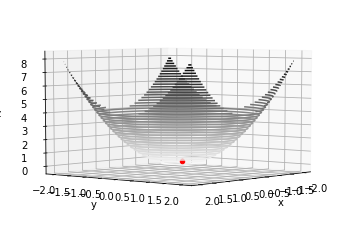

In [23]:
func = quad_II_3_cons
test_newton_cons(func)

On effectue un test sur la minimisation de $x^4 + y^4$ sous la contrainte, $3x + 7y = 10$ 

Temps d'execution : 0.002138853073120117 secondes
Estimation :  [0.81422531 1.07961772]
Ob value :  [1.7980835]
Nombre d'iterations :  3


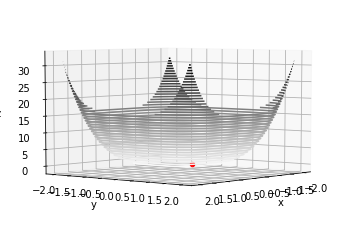

In [24]:
func = quad_II_4_cons
test_newton_cons(func)

#### Question 1-7. Comparer les deux méthodes précédentes.

Tableau comparatif des deux méthodes

In [25]:
test_summary2

,method,temps_exec,estimation,ob_value,nb_iter
quadric_2_1_GD,GD Backtracking,0.006647,"[0.4615381781103594, 0.6923078812597603]",[0.6923076923078082],28
quadric_2_1_N,Newton,0.000684,"[0.46153846153846156, 0.6923076923076923]",[0.6923076923076923],2
quadric_2_2_GD,GD Backtracking,0.007532,"[0.7272722828732161, 2.181818478084523]",[2.909090909091151],43
quadric_2_2_N,Newton,0.000674,"[0.7272727272727273, 2.1818181818181817]",[2.9090909090909087],2
quadric_2_3_GD,GD Backtracking,0.006244,"[0.5000003070471107, 0.49999969295288926]",[0.5000000000001885],28
quadric_2_3_N,Newton,0.000673,"[0.5, 0.5]",[0.5],2
quadric_2_4_GD,GD Backtracking,0.044307,"[0.8140362442635594, 1.0796987524584745]",[1.7980833126838227],96
quadric_2_4_N,Newton,0.000559,"[0.8142253132233676, 1.079617722904271]",[1.7980835009552176],3


Graphe comparatif du nombre d'itérations

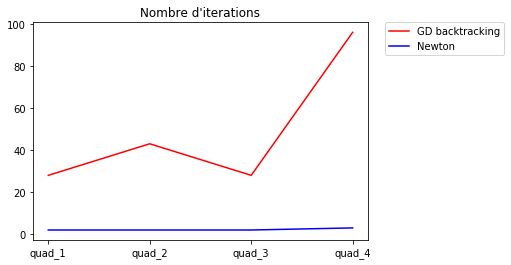

In [26]:
compare_nb_iter_cons(test_summary2)

Graphe comparatif du temps d'execution

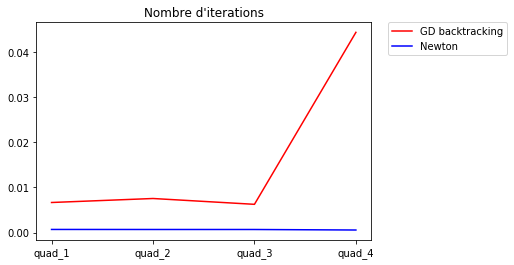

In [27]:
compare_exec_time_cons(test_summary2)

### 1.1.3 Bibliographie


#### Question 1-8. Qu’est-ce qu’une méthode de Quasi-Newton ?

Souvent, la hessienne nous est inconnue. Dans ce cas, on ne peut pas utiliser la méthode de Newton.

Une méthode de Quasi-Newton suit les memes étapes que celle de Newton, mais au
lieu d'utiliser la hessienne on va utiliser son approximation.

Afin d'approximer la hessienne, la méthode la plus utilisée est celle de Broyden, dans laquelle la matrice d'approximation B s'écrit :

$$ B_{k+1}=B_k+\frac{s_k-B_{k} y_k}{^ts_k\, B_{k}y_k} (^ts_k B_{k}) $$

avec $$ s_k = x_{k+1} – x_k, y_k = f (x_{k+1}) – f (x_k).$$

# 3 Thématiques plus avancées

## 3.1 SVM et SMO

####  Question 3-12. Expliqer le problème d’optimisation sous-jacent à un Support Vector Classi- fier ?

Le SVM est un classifier binaire pouvant être étende à la classification multiclasse dont l'objectif
est de maximiser la marge entre les deux classes. Une pénalité est attribué aux points se trouvant
du mauvais côté de la marge. Il s'agit d'un problème d'optimisation quadratique qui consiste à minimiser
la fonction suivante:

$L = \frac{\|w\|^2}{2} - \displaystyle\sum \alpha_i y_i (\mathbf x_i \mathbf w + b)$

En dérivant selon $\mathbf{w}$ et $\mathbf{b}$, on peut réécrire le problème sous sa forme dual qui revient à maximiser:

$L = \displaystyle\sum \alpha_i - \frac{1}{2}\displaystyle\sum \alpha_i \alpha_j y_i y_j (\mathbf x_i \mathbf x_j)$

On voit que le pronlème qui nous est posé dépend du produit scalaire entre deux échantillons. La règle de
décision s'écrit sous la forme suivante:

$D = \displaystyle\sum \alpha_i y_i (\mathbf x_i \mathbf u) + b >= 0 $ (u vecteur inconnu)

Dans le cas où le problème n'est pas linéairement séparable on peut calculer ce produit scalaire dans un autre espace
qui nous donne de meilleurs perspectives, avec comme avantage le fait de ne pas avoir à effectuer la transformation dans
le nouvel espace. Cela s'appelle le kernel trick. Par la suite nous étudierons l'impact du choix du noyau
quant à la performance du SVM.

####  Question 3-13. Implémenter la SMO. Laisser la possibilité de passer le noyau souhaité en argument.

In [ ]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
class SVM():
  def __init__(self, C=1.0, tol=0.01, max_passes=10, kernel='linear'):
    self.C = C
    self.tol = tol
    self.max_passes = max_passes
    self.kernel = kernel
    self.kernels = { 'linear' : self.kernel_linear,
                     'polynomial' : self.kernel_polynomial,
                     'rbf' : self.kernel_rbf,
                     'sigmoid' : self.kernel_sigmoid,
                   }
    self.alphas = []
    self.b = 0
    self.x = []
    self.y = []
    self.m = 0
  
  def predict(self, x_pred):
    K = self.kernels[self.kernel]
    out = 0
    for i in range(self.m):
      out += self.alphas[i] * self.y[i] * K(self.x[i], x_pred) \
             + self.b
    return np.sign(out)
                   
  def fit(self, x_train, y_train):
    self.x = np.copy(x_train)
    self.y = np.copy(y_train)
    self.m = x_train.shape[0]
    passes = 0
    self.alphas = np.zeros(self.m)
    old_alphas = np.zeros(self.m)

    while passes < self.max_passes:
      num_changed_alphas = 0
      
      for i in range(self.m):
        Ei = self.predict(self.x[i]) - self.y[i]
        if ((self.y[i] * Ei < -self.tol) and (self.alphas[i] < self.C)) \
            or ((self.y[i] * Ei > self.tol) and (self.alphas[i] > 0)):
          
          j = self.get_random(i)
          Ej = self.predict(self.x[j]) - self.y[j]
          old_alphas[i], old_alphas[j] = self.alphas[i], self.alphas[j]
          
          L, H = self.compute_L_H(self.alphas[j], self.alphas[j],
                                  self.y[i], self.y[j])        
          if L == H:
            continue
            
          n = self.compute_n(self.x[i], self.x[j])
          if n >= 0:
            continue
            
          self.alphas[j] = self.alphas[j] - float(self.y[j] * (Ei - Ej)) / n
          self.alphas[j] = max(self.alphas[j], L)
          self.alphas[j] = min(self.alphas[j], H)
          
          if abs(self.alphas[j] - old_alphas[j]) < 0.00001:
            continue
            
          self.alphas[i] = self.alphas[i] + self.y[i] * self.y[j] \
                           * (old_alphas[j] - self.alphas[j])
            
          K = self.kernels[self.kernel]

          b1 = self.b - Ei - self.y[i] * (self.alphas[i] - old_alphas[i]) \
               * K(self.x[i], self.x[i]) - self.y[j] \
               * (self.alphas[j] - old_alphas[j]) * K(self.x[i], self.x[j])
              
          b2 = self.b - Ej - self.y[i] * (self.alphas[i] - old_alphas[i]) \
               * K(self.x[i], self.x[j]) - self.y[j] \
               * (self.alphas[j] - old_alphas[j]) * K(self.x[j], self.x[j])
          
          self.b = self.compute_b(b1, b2, self.alphas[i], self.alphas[j])
          num_changed_alphas += 1

      if num_changed_alphas == 0:
        passes += 1
      else:
        passes = 0
    return self.alphas, self.b
          
  def compute_L_H(self, ai, aj, yi, yj):
    if(yi != yj):
      return (max(0, aj - ai), min(self.C, self.C + aj - ai))
    else:
      return (max(0, ai + aj - self.C), min(self.C, ai + aj))
  
  def compute_n(self, xi, xj):
    K = self.kernels[self.kernel]
    return  2 * K(xi, xj) - K(xi, xi) - K(xj, xj)
  
  def compute_b(self, b1, b2, ai, aj):
    if ai > 0 and ai < self.C:
      return b1
    if aj > 0 and aj < self.C:
      return b2
    return (b1 + b2) / 2
  
  def get_random(self, i):
    j = i
    while j == i:
      j = random.randint(0, self.m - 1)
    return j

  def kernel_linear(self, x, y):
    return np.dot(x, y.T)
  
  def kernel_polynomial(self, x, y, d=2):
    return np.dot(x, y.T)**d
  
  def kernel_rbf(self, x, y, sigma=1.0):
    return np.exp(-((np.linalg.norm(x - y)**2) / (2 * sigma**2)))
  
  def kernel_sigmoid(self, x, y):
    return np.tanh(np.dot(x, y.T))

#### Question 3-14. Tester l’implémentation précédente sur le problème de classification proposé par le dataset MNIST. Dans le but de traiter un problème de classification binaire on se limite au repérage d’un chiffre. Garder le noyau qui vous donne les meilleurs résultats suivant la métrique de votre choix.

### Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_filter = np.where((y_train == 3) | (y_train == 4))
test_filter = np.where((y_test == 3) | (y_test == 4))
x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]
image_test = np.copy(x_test)
x_train.shape, x_test.shape

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train[y_train == 3] = 1
y_train[y_train == 4] = -1
y_test[y_test == 3] = 1
y_test[y_test == 4] = -1
print(y_train, y_test)

### Preprocess

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

### Test

In [ ]:
def accuracy(y, y_hat):
    idx = np.where(y_hat == 1)
    true_pos = np.sum(y_hat[idx] == y[idx])
    idx = np.where(y_hat == -1)
    true_neg = np.sum(y_hat[idx] == y[idx])
    return float(true_pos + true_neg) / y.shape[0]

In [ ]:
kernels = ['linear', 'polynomial', 'rbf', 'sigmoid']

for k in kernels:
  model = SVM(kernel=k)
  alphas, b = model.fit(x_train[:100], y_train[:100])
  #print(alphas, b)

  n = x_test.shape[0]
  y_pred = np.zeros(n)

  print("Running %s tests" % str(n))
  for i in range(n):
    y_pred[i] = model.predict(x_test[i])
    #if (y_test[i] != y_pred[i]):
    #  print(y_test[i], y_pred[i])
  acc = accuracy(y_test, y_pred)
  print("accuracy for kernel %s: %s\n" % (k, str(acc)))

#### Question 3-15. Implémenter une méthode de résolution par barrière logarithmique d’un SVM. Comparer cette démarche à la SMO.

### References
[1] John C. Platt Sequential Minimal Optimization: A Fast Algorithm for Training Support Vector Machines, Microsoft Research 1998